[*********************100%***********************]  1 of 1 completed
Predicted exchange rate: 81.76


/Users/yashedake/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


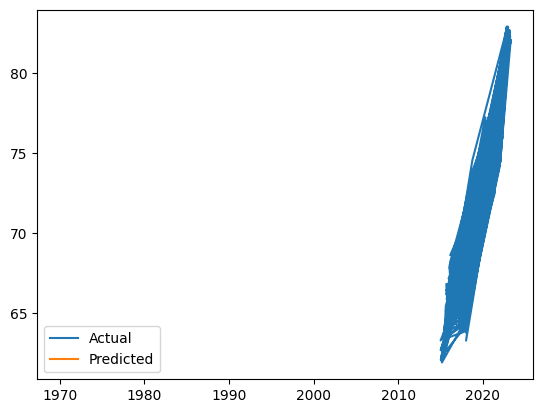

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import configparser
import matplotlib.pyplot as plt

# Read config file

config = configparser.ConfigParser()
config.read('config.ini')

# Yahoo Finance API parameters
symbol = config['YahooFinance']['symbol']
start_date = config['YahooFinance']['start_date']
end_date = config['YahooFinance']['end_date']

# Machine learning model parameters
test_size = float(config['Model']['test_size'])
shuffle_data = bool(config['Model']['shuffle_data'])

# Download exchange rate data from Yahoo Finance
df = yf.download(symbol, start=start_date, end=end_date)

# Create a new DataFrame with only the exchange rate column and date index
df = df.loc[:, ['Close']]
df.index.names = ['Date']
df.columns = ['Exchange_Rate']

# Add a new column with the lagged exchange rate
df['Lagged_Rate'] = df['Exchange_Rate'].shift(1)

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into training and testing sets
X = df.loc[:, ['Lagged_Rate']]
y = df.loc[:, 'Exchange_Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=shuffle_data)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the exchange rate
last_exchange_rate = df.iloc[-1]['Exchange_Rate']
predicted_exchange_rate = model.predict([[last_exchange_rate]])
print(f'Predicted exchange rate: {predicted_exchange_rate[0]:.2f}')

plt.plot(y_test, label="Actual")
plt.plot(predicted_exchange_rate, label="Predicted")
plt.legend()
plt.show()


In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load data
data = pd.read_csv('dataset.csv')

# Split data into features and target
X = data.drop(['target'], axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict the target for test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


KeyError: "['target'] not found in axis"

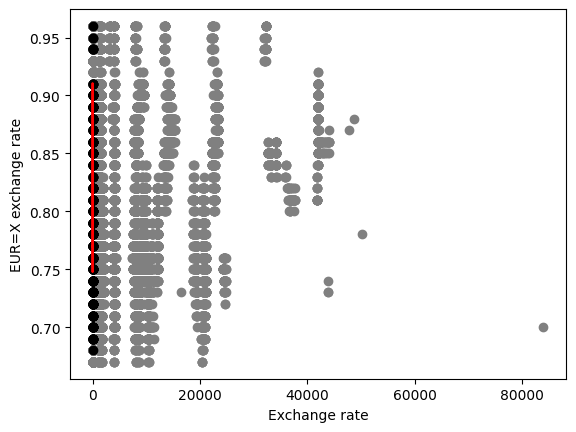

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('dataset.csv')
df.dropna(inplace=True)
# Set the target column and drop the date column
target_col = 'EUR=X'
df.drop(columns=['Date'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[target_col]), df[target_col], test_size=0.2, random_state=42)

# Create the SVM model
model = SVR(kernel='linear')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Plot the predicted vs real values for all currencies
for col in df.columns:
    if col != target_col:
        plt.scatter(df[col], df[target_col], color='gray')
plt.scatter(X_test.iloc[:, 0], y_test, color='black')
plt.plot(X_test.iloc[:, 0], y_pred, color='red')
plt.xlabel('Exchange rate')
plt.ylabel('EUR=X exchange rate')
plt.show()


[*********************100%***********************]  38 of 38 completed


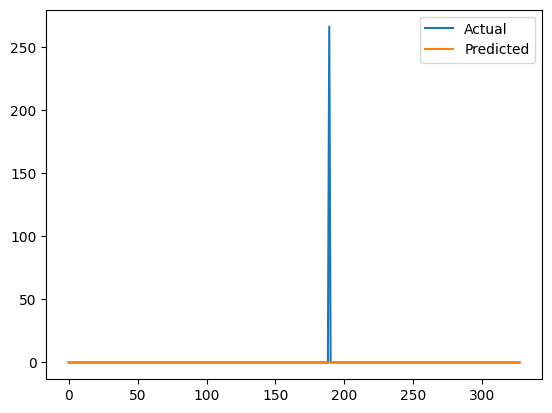

In [14]:
import yfinance as yf
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define ticker symbols
tickers = ['CNY=X', 'OMR=X', 'IRR=X', 'THB=X', 'SYP=X', 'EUR=X', 'MYR=X', 'YER=X', 'VND=X', 'ILS=X', 'JPY=X', 'LKR=X', 'IQD=X', 'PKR=X', 'KWD=X', 'KHR=X', 'UZS=X', 'SGD=X', 'INR=X', 'BDT=X', 'PHP=X', 'JOD=X', 'LAK=X', 'IDR=X', 'KRW=X', 'KZT=X', 'AED=X', 'BHD=X', 'LBP=X', 'TRY=X', 'TMT=X', 'SAR=X', 'MVR=X', 'QAR=X', 'MMK=X', 'NPR=X', 'BND=X', 'AFN=X']

# Download data from yfinance
data = yf.download(tickers=tickers, period="max")

# Preprocess data
data = data['Close'].dropna()
data = data.pct_change().dropna()

# Split data into features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create SVM model
model = svm.SVR(kernel='rbf')

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the predicted vs actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [15]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Get currency exchange rates data from yfinance
tickers = ["CNY=X", "OMR=X", "IRR=X", "THB=X", "SYP=X", "EUR=X", "MYR=X", "YER=X", "VND=X", "ILS=X", "JPY=X", "LKR=X", "IQD=X", "PKR=X", "KWD=X", "KHR=X", "UZS=X", "SGD=X", "INR=X", "BDT=X", "PHP=X", "JOD=X", "LAK=X", "IDR=X", "KRW=X", "KZT=X", "AED=X", "BHD=X", "LBP=X", "TRY=X", "TMT=X", "SAR=X", "MVR=X", "QAR=X", "MMK=X", "NPR=X", "BND=X", "AFN=X"]
start_date = "2010-01-01"
end_date = "2022-05-04"
df = yf.download(tickers, start=start_date, end=end_date, group_by="ticker")

# Preprocess data
X = df.dropna().values[:, :-1] # Use all columns except the last one (date)
y = df.dropna().values[:, -1] # Use the last column (exchange rate)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted values for each currency
for i, ticker in enumerate(tickers):
    plt.figure()
    plt.scatter(range(len(y_test[:, i])), y_test[:, i], color="blue", label="Actual")
    plt.scatter(range(len(y_pred[:, i])), y_pred[:, i], color="red", label="Predicted")
    plt.title(ticker)
    plt.legend()
    plt.show()


[*********************100%***********************]  38 of 38 completed


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

[*********************100%***********************]  2 of 2 completed


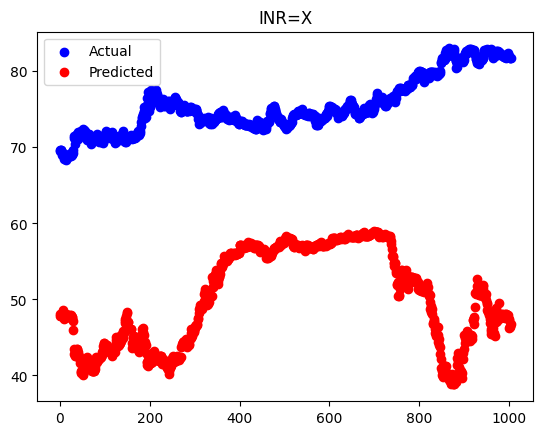

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define list of tickers
tickers = ['INR=X','CNY=X']

# Load data from yfinance
df = yf.download(tickers, period="max")

# Keep only the 'Close' prices
df = df['Close']
import pandas as pd
df.dropna(inplace=True)

# Forward fill missing values
df.fillna(method="ffill", inplace=True)

# Create X and y arrays
X = df.drop(columns=["INR=X"])
y = df["INR=X"]

# Scale the X array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Train the model
model = SVR(kernel="rbf")
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Plot the actual vs predicted values for each currency

plt.figure()
plt.scatter(range(len(y_test)), y_test.values, color="blue", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted")
plt.title(tickers[0])
plt.legend()
plt.show()


In [25]:
import yfinance as yf

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Define list of tickers
tickers = ['CNY=X','INR=X']

# Load data from yfinance
df = yf.download(tickers, period="max")

# Keep only the 'Close' prices
df = df['Close']

# Forward fill missing values
df.dropna(inplace=True)

# Create X and y arrays
X = df.drop(columns=["INR=X"])
y = df["INR=X"]

# Scale the X array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, shuffle=False)

# Train the model
model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)
# Plot the actual vs predicted values for each currency

plt.figure()
plt.scatter(range(len(y_test)), y_test.values, color="blue", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted")
plt.title(tickers[1])
plt.legend()
plt.show()


[*********************100%***********************]  2 of 2 completed


ValueError: Unknown label type: 'continuous'